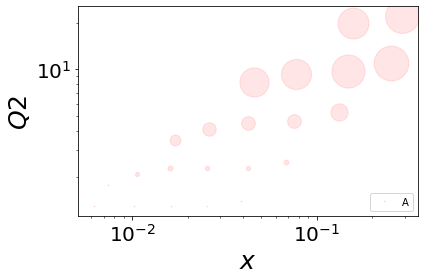

In [1]:
from __future__ import division
import numpy as np
import ratlib as rat
import pandas as pd
import affinity as af
#--matplotlib
import matplotlib

#matplotlib.use('Agg')
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
#matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#matplotlib.rc('text',usetex=True)
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.lines import Line2D
import pylab as py

import matplotlib.gridspec as gridspec
%matplotlib inline





def get_tab():

    tab = pd.read_excel("expdata/expdata/1008.xlsx")
    npts = tab.shape[0] #--number of rows

    Aff=[]
    for i in range(npts):
        x=tab["x"].values[i]
        z=tab["z"].values[i]
        Q=tab["Q2"].values[i]**.5
        val=tab["value"].values[i]
        P_t=tab["pT"].values[i]

        q_t = -P_t/z
        #eta = 30

        M= .94
        M_h=.14


        N = 1000
        xi = np.random.uniform(x-.1,x+.1,N)
        zeta = np.random.uniform(z-.1,z+.1,N)
        delta_k_t = np.random.uniform(0.3,0.4,N)
        k_i_t = np.random.uniform(0,0.1,N)
        M_ki = np.random.uniform(0,0.1,N)
        M_kf = np.random.uniform(0,0.1,N)








        eta = rat.get_eta( M,M_h,x,z,Q,q_t)
        affinity =af.get_affinity(M,M_h,x,z,eta,Q,q_t,xi,zeta,delta_k_t,k_i_t,M_ki,M_kf)
        Aff.append(affinity)
    tab['Aff']=pd.Series(Aff,index=tab.index)    
    return tab
'''
def plot_XZ(tab):

    nrows,ncols =1,1
    fig =py.figure(figsize=(ncols*6,nrows*4))
    ax=py.subplot(nrows,ncols,1)
    #print tab['Aff'] 

def plot_ZQ(tab):

    nrows,ncols =1,1
    fig =py.figure(figsize=(ncols*6,nrows*4))
    ax=py.subplot(nrows,ncols,1)
    #print tab['Aff']

def plot_PTQ(tab):

    nrows,ncols =1,1
    fig =py.figure(figsize=(ncols*6,nrows*4))
    ax=py.subplot(nrows,ncols,1)
    #print tab['Aff']

def plot_XPT(tab):

    nrows,ncols =1,1
    fig =py.figure(figsize=(ncols*6,nrows*4))
    ax=py.subplot(nrows,ncols,1)
    #print tab['Aff']  

def plot_XQ(tab):

    nrows,ncols=1,1
    fig = py.figure(figsize=(ncols*6,nrows*4))
    ax=py.subplot(nrows,ncols,1)
    #print tab['Aff']

def plot_PTZ(tab):

    nrows,ncols =1,1
    fig =py.figure(figsize=(ncols*6,nrows*4))
    ax=py.subplot(nrows,ncols,1)
    #print tab['Aff']  

def plot_PTCROSS(tab):

    nrows,ncols =1,1
    fig =py.figure(figsize=(ncols*6,nrows*4))
    ax=py.subplot(nrows,ncols,1)
    #print tab['Aff']       
'''
def plot_XQ(tab):

    nrows,ncols=1,1
    fig = py.figure(figsize=(ncols*6,nrows*4))
    ax=py.subplot(nrows,ncols,1)
    #print tab['Aff']  


    uval = np.unique(tab['value'])
    upT = np.unique(tab['pT'])
    uz = np.unique(tab['z'])
    ux =np.unique(tab['x'])
    uQ2=np.unique(tab['Q2'])

    data={}
    for i in range(ux.size):
        for j in range(uQ2.size):
            key=(ux[i],uQ2[j])
            if key not in data: data[key]=0
            
    npts = tab.shape[0] #--number of rows
    for i in range(npts):
        x=tab["x"].values[i]
        Q2=tab["Q2"].values[i]
        Aff=tab["Aff"].values[i]
        key=(x,Q2)
        data[key]+=Aff


    for key in data:
        x,Q2=key

        
        ax.plot(x,Q2
            ,ls='none'
            ,marker='o'
            ,color='r'
            ,markersize=data[key], alpha=0.1)
    
    

    

    ax.legend('A',loc='lower right')
    ax.semilogx() 
    ax.semilogy()
    ax.set_xlabel(r'$x$',size=25)
    #ax.set_xlabel(r'$x_{\rm bj}$',size=25)
    ax.set_ylabel(r'$Q2$',size=25)
    ax.tick_params(axis='both', which='major', labelsize=20)
    
    py.tight_layout()
    #py.savefig('test-XQ.png')
    #py.show()

if __name__=="__main__":

    tab=get_tab()
    plot_XQ(tab)